In [ ]:
from music21 import *
import os
import random
import numpy as np
import kagglehub
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def read_midi(file):

    print("Loading Music File:",file)

    notes=[]
    notes_to_parse = None

    #parsing a midi file
    midi = converter.parse(file)

    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:

        #select elements of only piano
        if 'Piano' in str(part):

            notes_to_parse = part.recurse()

            #finding whether a particular element is note or a chord
            for element in notes_to_parse:

                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))

                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/"

# Download latest version
path = '/content/drive/My Drive/Makeover'
print("Path to dataset files:", path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 20piece   archive   Cat.jpg  'Colab Notebooks'   Love.wav   Makeover   midi1.midi
Path to dataset files: /content/drive/My Drive/Makeover


In [ ]:

files = []
for root, dirs, filenames in os.walk(path):
    files.extend([os.path.join(root, file) for file in filenames if file.endswith(".mid")])

# Limit to the number of files
# files = files[:2]
print("Selected files:", files)

# Use the file path directly from 'files'
notes_array= []
for file in files:
    notes = read_midi(os.path.join(path, file))
    notes_array.append(notes)


Selected files: ['/content/drive/My Drive/Makeover/Sam_Smith_-_Stay_With_Me_Easy-Piano edit.mid', '/content/drive/My Drive/Makeover/Adele_-_Someone_Like_You-Piano edit.mid', '/content/drive/My Drive/Makeover/Aerosmith_-_I_Dont_Want_To_Miss_A_Thing-Piano,_Piano edit.mid', '/content/drive/My Drive/Makeover/Akira_Yamaoka_-_Silent_Hill_2_-_-_promise-Piano edit.mid', '/content/drive/My Drive/Makeover/Anime_music_-_Liar_Mask_Akame_ga_Kill_OP_2_Version_2.3_Version_2.3-Piano edit.mid', '/content/drive/My Drive/Makeover/AtinPiano_-_Trishas_Lullaby-Piano,_Piano edit.mid', '/content/drive/My Drive/Makeover/Ben_E_King_-_Stand_By_Me-Piano Edit.mid', '/content/drive/My Drive/Makeover/Billie_Eilish_-_What_Was_I_Made_For_Arr._Mattea_Lee-Piano,_Piano edit.mid', '/content/drive/My Drive/Makeover/Bobby_Helms_-_Jingle_Bell_Rock-Piano,_Piano edit.mid', '/content/drive/My Drive/Makeover/Borislav_Slavov_-_Down_by_the_River_From_the_game_Baldurs_gate_III_arr_lamento96.mid', '/content/drive/My Drive/Makeover/C

In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

215


(array([161.,  29.,   9.,   6.,   3.,   4.,   1.,   1.,   0.,   1.]),
 array([  1.,  53., 105., 157., 209., 261., 313., 365., 417., 469., 521.]),
 <BarContainer object of 10 artists>)

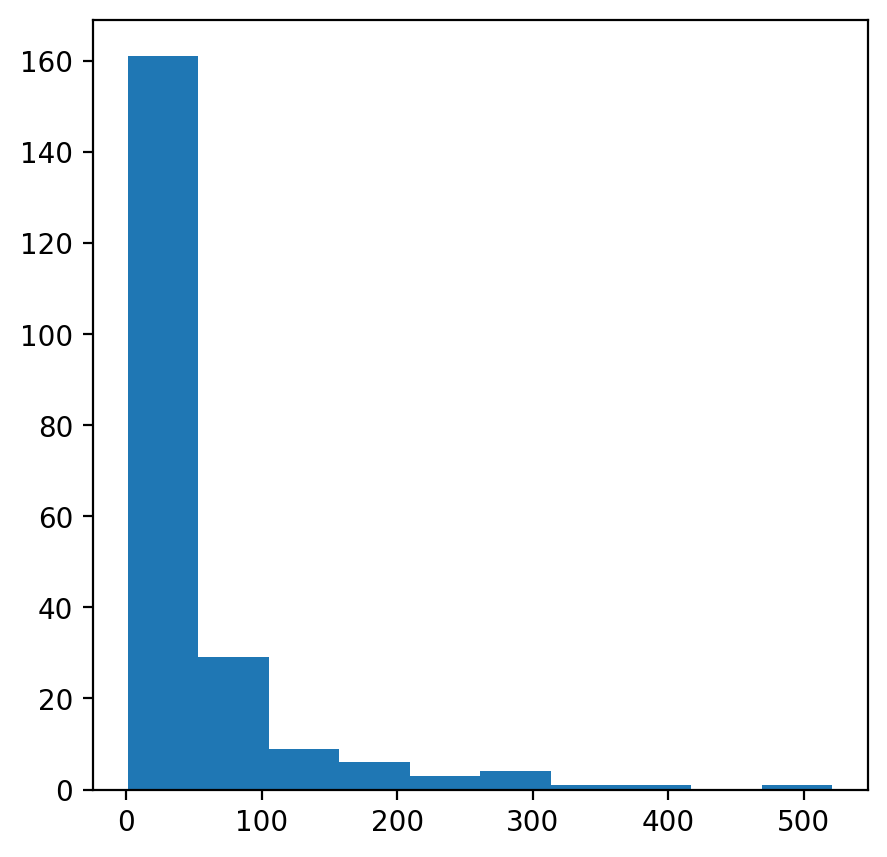

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

56


In [ ]:
# select the high frequency note
new_music = []
for notes in notes_array:
    temp_notes = []
    for note_ in notes:
        if note_ in frequent_notes:
            temp_notes.append(note_)
    new_music.append(temp_notes)

new_music = np.array(new_music, dtype=object)
print(new_music)


[list(['C5', 'D5', 'E5', 'C5', 'D5', 'E5', 'C5', 'D5', 'E5', 'C5', 'C5', 'C5', 'D5', 'E5', 'C5', 'E5', 'C5', 'D5', 'E5', 'G5', 'E5', 'E5', 'A5', 'G5', 'E5', 'D5', 'D5', 'C5', 'A4', 'G4', 'E4', 'E4', 'C5', 'D5', 'E5', 'C5', 'D5', 'E5', 'C5', 'D5', 'E5', 'C5', 'C5', 'C5', 'E5', 'G5', 'A5', 'G5', 'E5', 'E5', 'C5', 'D5', 'C5', 'E5', 'C5', 'C5', 'C5', 'E5', 'G5', 'G5', 'A5', 'A5', 'G5', 'E5', 'E5', 'D5', 'C5', 'C5', 'C5', 'D5', 'C5', 'E5', 'C5', 'C5', 'C5', 'C5', 'D5', 'E5', 'C5', 'D5', 'E5', 'C5', 'D5', 'E5', 'C5', 'C5', 'C5', 'D5', 'E5', 'C5', 'E5', 'C5', 'D5', 'E5', 'G5', 'E5', 'E5', 'A5', 'G5', 'E5', 'D5', 'D5', 'C5', 'A4', 'G4', 'E4', 'E4', 'C5', 'D5', 'E5', 'C5', 'D5', 'E5', 'C5', 'D5', 'E5', 'C5', 'C5', 'C5', 'E5', 'G5', 'A5', 'G5', 'E5', 'E5', 'C5', 'D5', 'C5', 'E5', 'C5', 'C5', 'C5', 'E5', 'G5', 'G5', 'A5', 'A5', 'G5', 'E5', 'E5', 'D5', 'C5', 'C5', 'C5', 'D5', 'C5', 'E5', 'C5', 'C5', 'C5', 'C5', 'E5', 'G5', 'A5', 'A5', 'G5', 'E5', 'E5', 'G4', 'A4', 'C5', 'D5', 'E5', 'D5', 'C5', 'C5

In [ ]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):

        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]

        x.append(input_)
        y.append(output)

x=np.array(x)
y=np.array(y)

In [ ]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))


In [ ]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)

x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y))
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:

from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()

#embedding layer
model = Sequential()
model.add(Embedding(input_dim=len(unique_x), output_dim=100, input_length=32, trainable=True))
model.add(Conv1D(64, 3, padding='causal', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu', dilation_rate=2, padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 3, activation='relu', dilation_rate=4, padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))

model.build(input_shape=(None, no_of_timesteps))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 32, 100)             │           5,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 32, 64)              │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 16, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 16, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 8, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 4, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 56)                  │          14,392 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,312 (891.84 KB)

 Trainable params: 228,312 (891.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model checkpoint callback
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True, verbose=1)  # Changed file extension to .keras

# Train the model
# The second output in 'y' should be y_durations_tr, not y_nodes_val
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=64,epochs=40, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])


# Load the best model
from keras.models import load_model
model = load_model('best_model.keras')

Epoch 1/40
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.7244
Epoch 1: val_loss improved from inf to 3.34310, saving model to best_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 3.7194 - val_loss: 3.3431
Epoch 2/40
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.0379
Epoch 2: val_loss improved from 3.34310 to 2.90502, saving model to best_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 3.0354 - val_loss: 2.9050
Epoch 3/40
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.6780
Epoch 3: val_loss improved from 2.90502 to 2.69937, saving model to best_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 2.6772 - val_loss: 2.6994
Epoch 4/40
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.4825
Epoch 4: val_loss improved from 2.69937 to 2.54534, saving model to best_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 2.4823 - val_loss: 2.5453
Epoch 5/40
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.3828
Epoch 5: val_loss improved from 2.5453

In [ ]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(20):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[42, 42, 28, 28, 28, 27, 27, 28, 28, 47, 27, 28, 28, 47, 33, 28, 33, 28, 33, 32]


In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x))
predicted_notes = [x_int_to_note[i] for i in predictions]

In [ ]:
def convert_to_midi(prediction_output):

    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:

        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:

                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)

            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)

        # pattern is a note
        else:

            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [ ]:
# Export the midi file and play
from IPython.display import Audio, display

convert_to_midi(predicted_notes)
midi_path = 'music.mid'

!apt-get install -y timidity
from IPython.display import Audio

if os.path.exists('out.wav'):
    os.remove('out.wav')

!timidity {midi_path} -Ow -o - | ffmpeg -i - -acodec pcm_s16le -ar 44100 -ac 2 out.wav

display(Audio('out.wav'))

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
timidity is already the newest version (2.14.0-8ubuntu1.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Playing music.mid
MIDI file: music.mid
Format: 1  Tracks: 2  Divisions: 10080
Track name: 
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enab